In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [ ]:
df = pd.read_csv('bombay.csv').iloc[:,-4:] #Data contains Month,Day,Year<temperature
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   9266 non-null   int64  
 1   Day     9266 non-null   int64  
 2   Year    9266 non-null   int64  
 3   Temp    9266 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 289.7 KB


,Month,Day,Year,Temp
0,1,1,1995,71.8
1,1,2,1995,72.0
2,1,3,1995,70.3
3,1,4,1995,69.7
4,1,5,1995,71.3


**PRE-PROCESSING AND GRAPHS**

In [ ]:
df['date']= df.Day.astype(str) + '-' + df['Month'].astype(str) +df['Year'].astype(str) # Combined 'Day', 'Month', and 'Year' columns into a single 'date' column as a string
df.set_index(pd.to_datetime(df["date"], format = "%d-%m%Y"), inplace=True) # Converted the 'date' column to a datetime format and set it as the index of the DataFrame
df = df.iloc[:, 3:4] #Selected only the temperature column and date(index now)
df

,Temp
date,
1995-01-01,71.8
1995-01-02,72.0
1995-01-03,70.3
1995-01-04,69.7
1995-01-05,71.3
...,...
2020-05-09,87.3
2020-05-10,87.7
2020-05-11,88.1


<Axes: xlabel='date'>

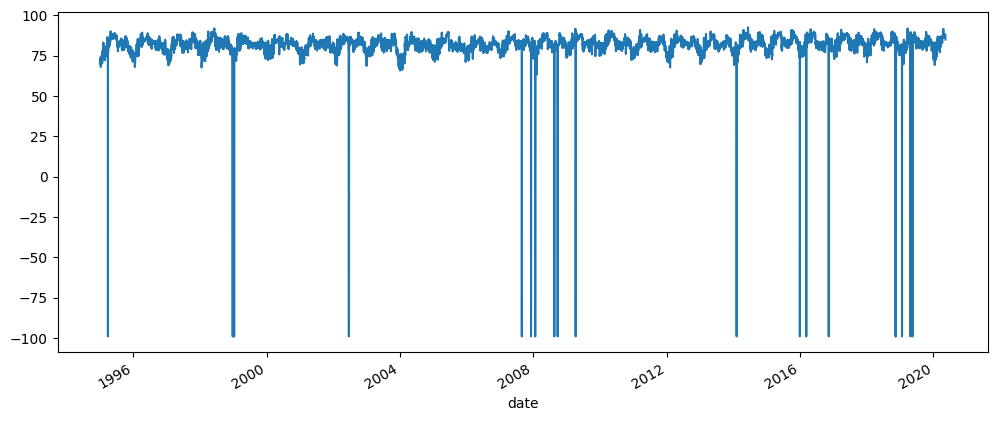

In [ ]:
df['Temp'].plot(figsize=(12,5)) #Plotted temperature column (-99 temperature means missing values or unusual values which we will remove)

In [ ]:
df = df[~(df.Temp == -99)] # Remove rows from the DataFrame where the 'Temp' column equals -99

In [ ]:

plt.style.use('fivethirtyeight') ## Set the style for the plot to 'fivethirtyeight'


df['Temp'].plot(figsize=(100, 25), linewidth=1) # Plot the 'Temp' column from the DataFrame with specified figure size and linewidth


plt.title('Temperature over time', fontsize=75) # Set the title of the plot with a large font size


plt.xticks(fontsize=50) # Set the font size for x-axis and y-axis tick labels
plt.yticks(fontsize=50)


plt.show() # Display the plot

In [ ]:
df.Temp = df.Temp.resample('MS').mean() #Resampling the 'Temp' column to calculate the mean for each month ('MS' stands for month start frequency)
df.dropna(inplace=True) #Dropped missing values
df.head()

<ipython-input-7-c047179a7be2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Temp = df.Temp.resample('MS').mean() #Resampling the 'Temp' column to calculate the mean for each month ('MS' stands for month start frequency)
<ipython-input-7-c047179a7be2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True) #Dropped missing values


,Temp
date,
1995-01-01,72.393548
1995-02-01,76.214286
1995-03-01,79.393333
1995-04-01,84.120000
1995-05-01,86.819355


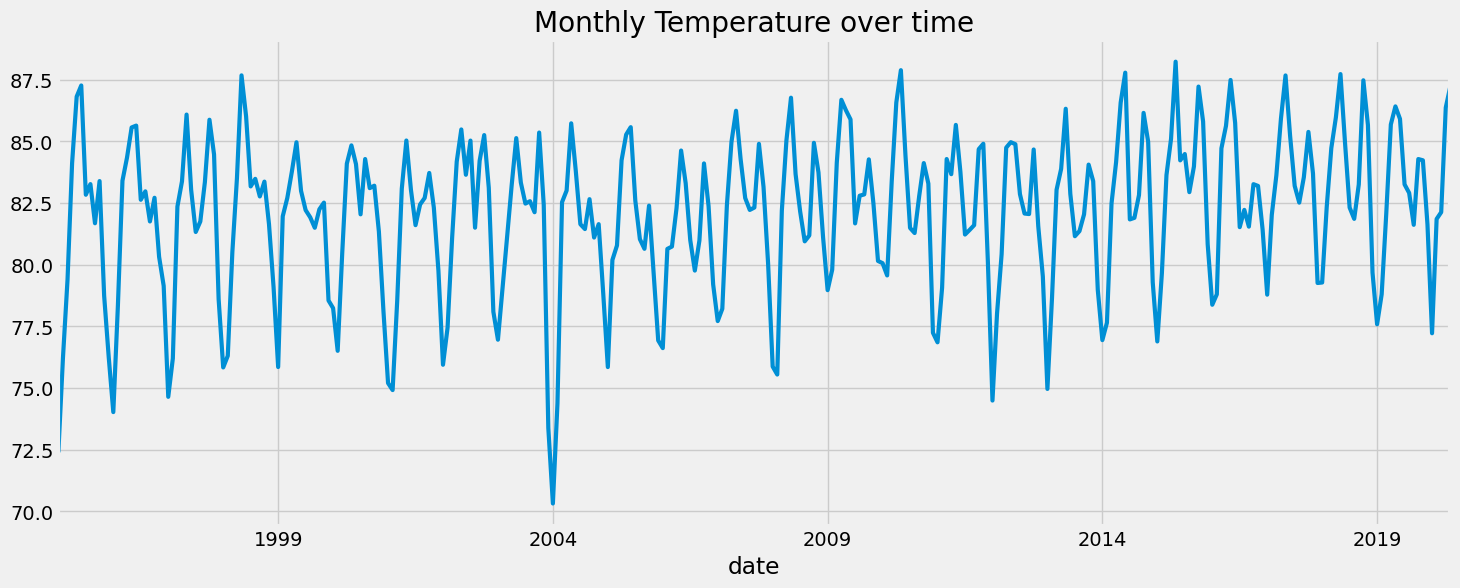

In [ ]:
plt.style.use('fivethirtyeight')
df['Temp'].plot(figsize=(16,6), linewidth=3)
plt.title('Monthly Temperature over time')
plt.show()

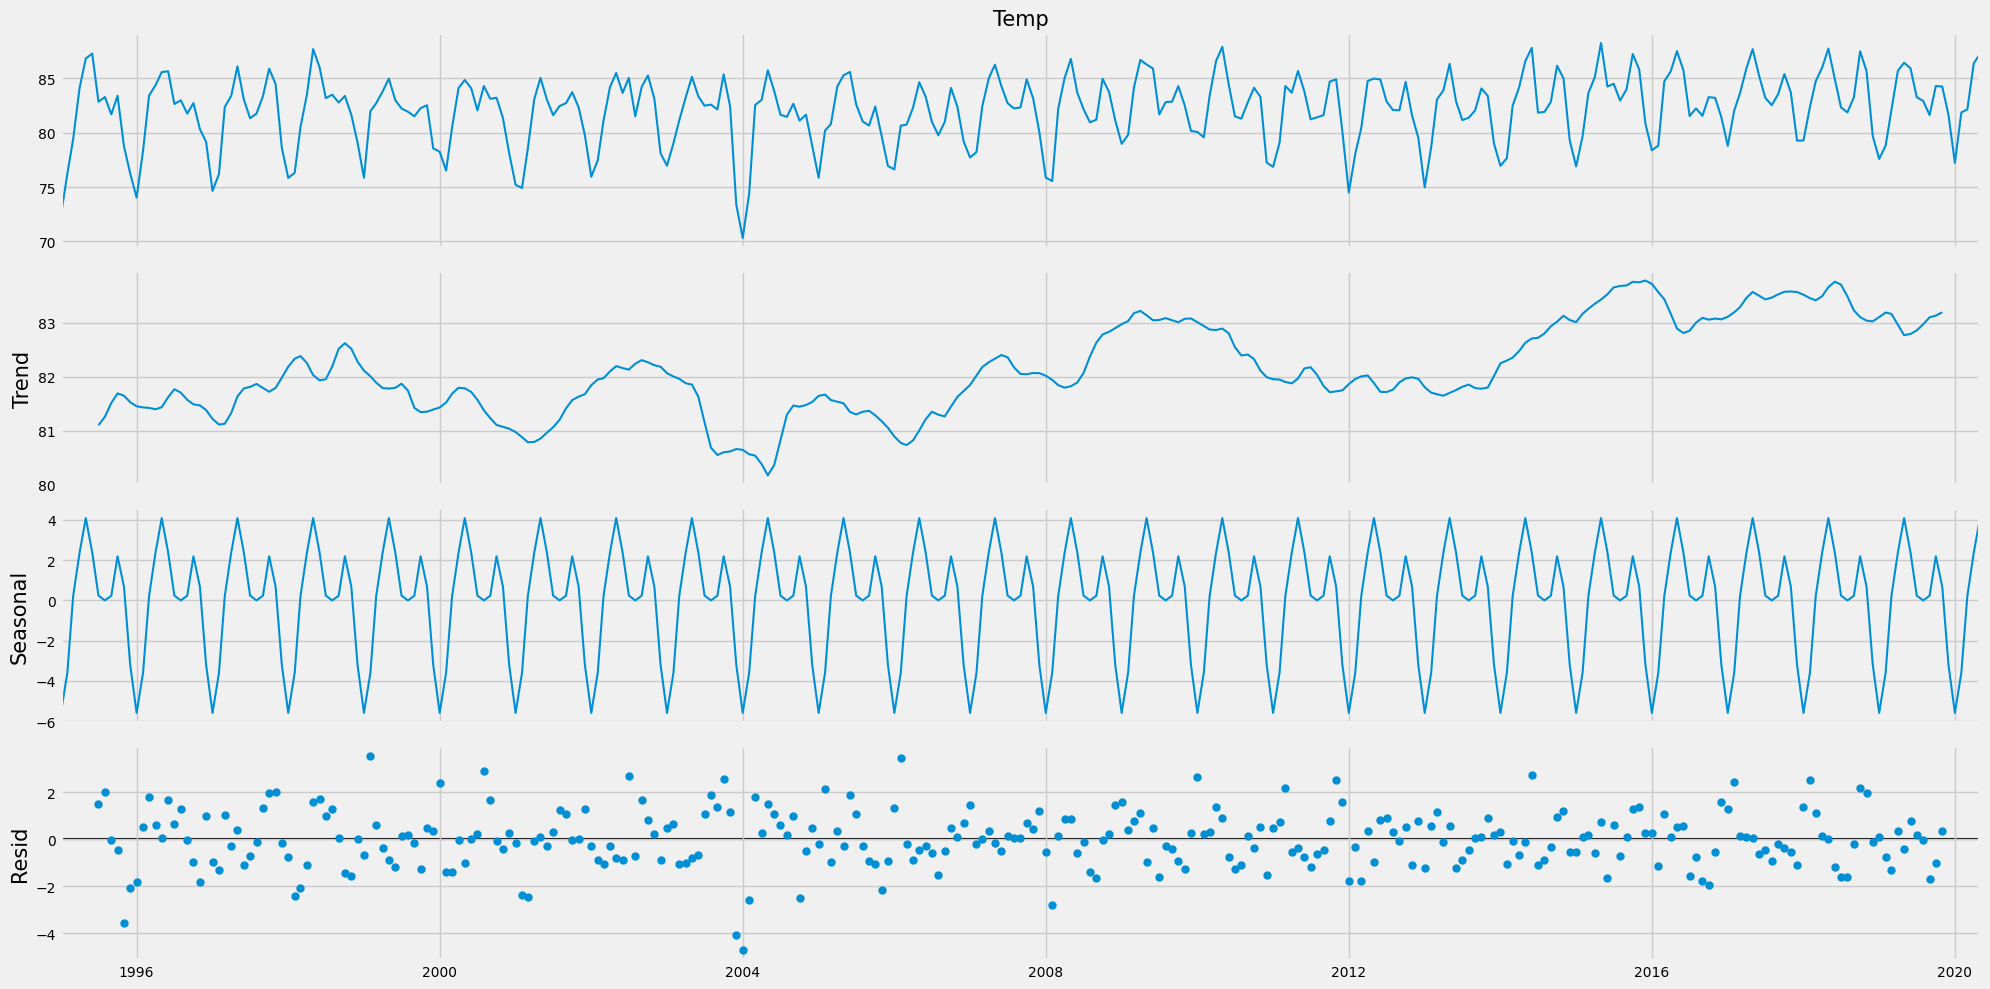

In [ ]:
# Set the figure size and font sizes for the plot
rcParams['figure.figsize'] = 20, 10
rcParams['axes.labelsize'] = 15
rcParams['axes.titlesize'] = 15
rcParams['font.size'] = 10
rcParams['lines.linewidth'] = 1.5
rcParams['lines.markersize'] = 5

# Performing seasonal decomposition of the 'Temp' column using an additive model
decomposition = sm.tsa.seasonal_decompose(df.Temp, model='additive')

# Created a plot of the decomposed components (trend, seasonal, and residual)
fig = decomposition.plot()

# Displaying the plot
plt.show()


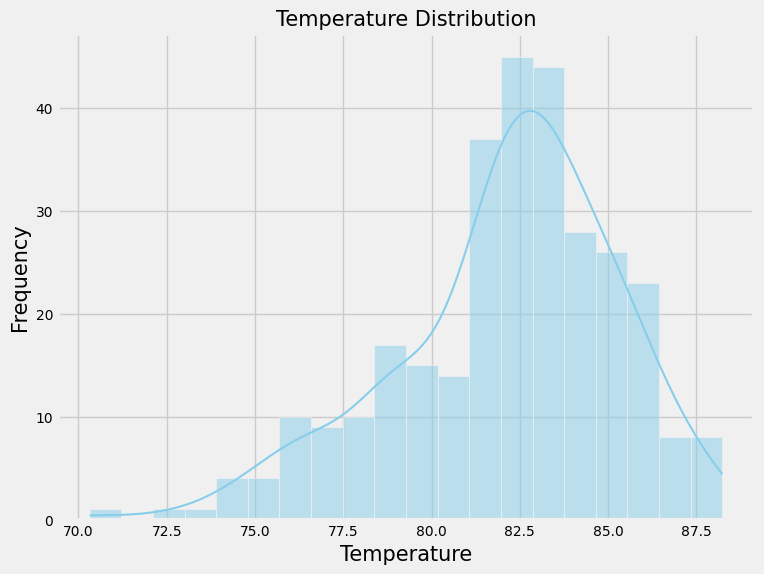

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Temp'], bins=20, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

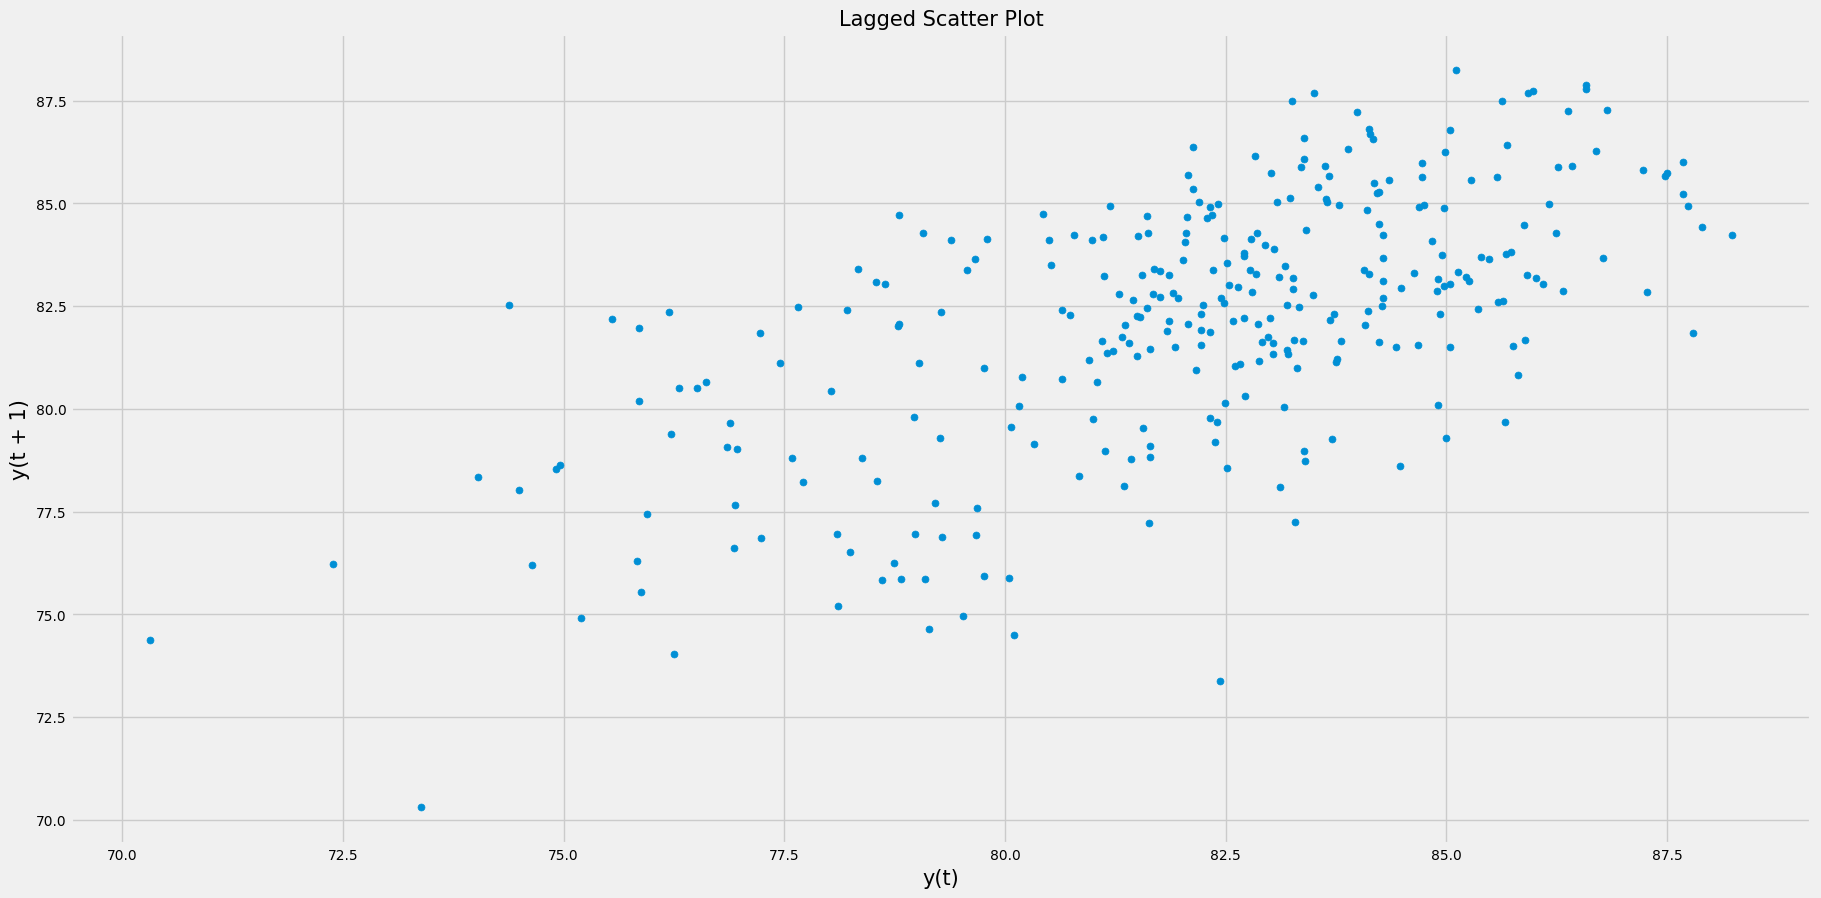

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df['Temp'])
plt.title('Lagged Scatter Plot')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


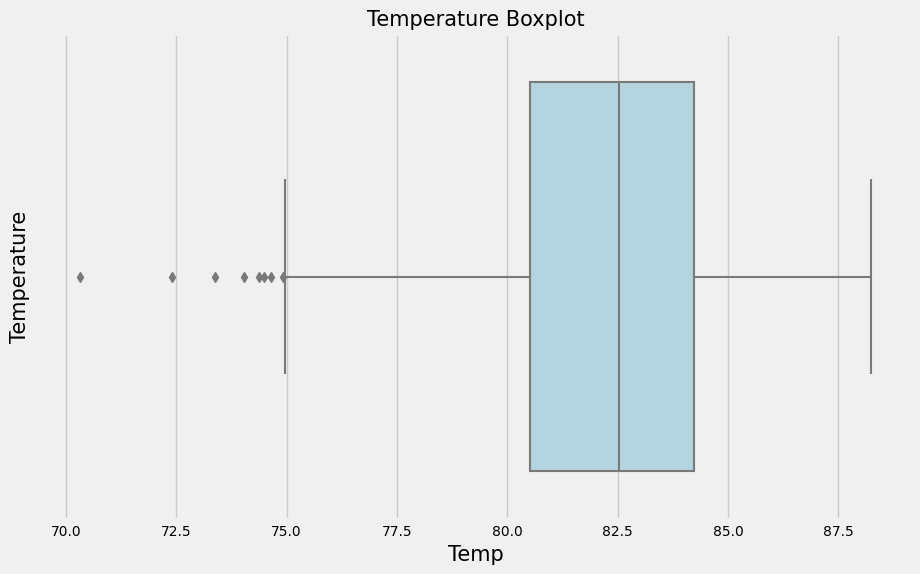

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='Temp', data=df, orient='v', color='lightblue')
plt.title('Temperature Boxplot')
plt.ylabel('Temperature')
plt.show()


**ADF TEST**

<ipython-input-10-fb412be9786c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean()
<ipython-input-10-fb412be9786c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window=12).std()


Test Statistics              -1.843000
p-value                       0.359332
lags used                    14.000000
no. of observations used    290.000000
dtype: float64
criticality 1%: -3.453102162983312
criticality 5%: -2.871558538275452
criticality 10%: -2.5721082282996433


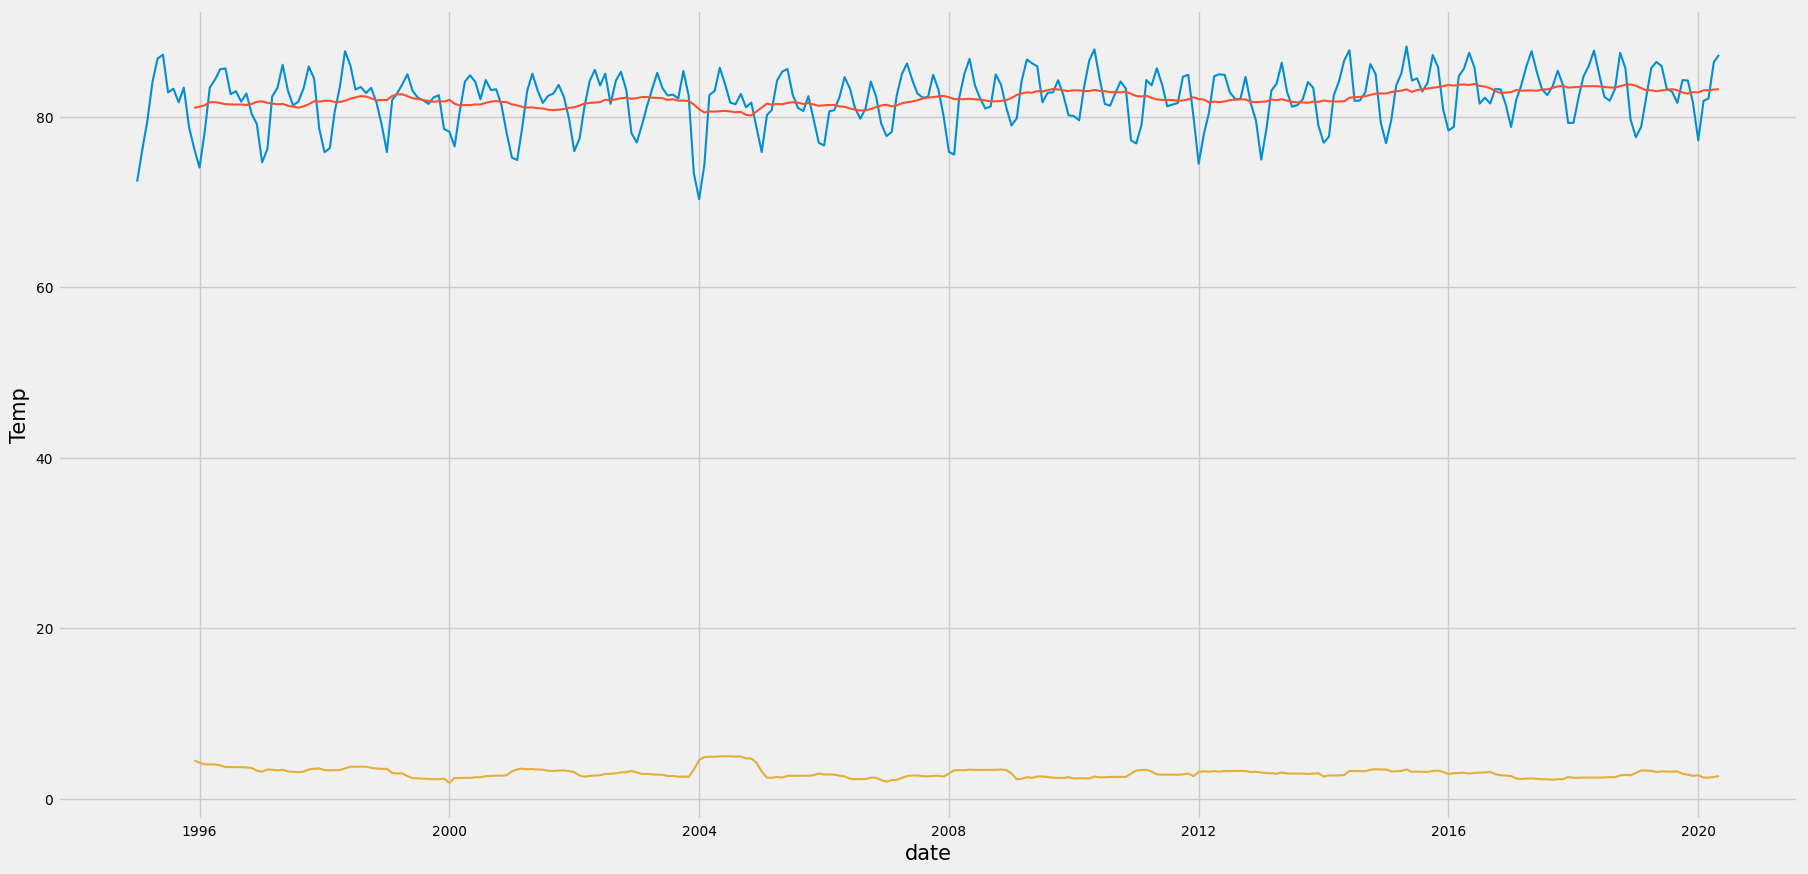

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Define a function to test the stationarity of a time series
def test_stationarity(df, var):
    # Calculating rolling mean and rolling standard deviation with a window of 12 time periods
    df['rollMean'] = df[var].rolling(window=12).mean()
    df['rollStd'] = df[var].rolling(window=12).std()

    # Perform the Augmented Dickey-Fuller test
    adftest = adfuller(df[var], autolag='AIC')

    # Print the test statistics and results
    stats = pd.Series(adftest[:4], index=['Test Statistics', 'p-value', 'lags used', 'no. of observations used'])
    print(stats)

    # Print the critical values
    for k, v in adftest[4].items():
        print(f'criticality {k}: {v}')

    # Create line plots to visualize the time series, rolling mean, and rolling standard deviation
    sns.lineplot(data=df, x=df.index, y=df[var])
    sns.lineplot(data=df, x=df.index, y=df['rollMean'])
    sns.lineplot(data=df, x=df.index, y=df['rollStd'])

# Call the function to test stationarity of the 'Temp' time series
test_stationarity(df, 'Temp')


Test Statistics            -8.619611e+00
p-value                     6.155782e-14
lags used                   1.300000e+01
no. of observations used    2.790000e+02
dtype: float64
criticality 1%: -3.4540076534999957
criticality 5%: -2.8719557347997178
criticality 10%: -2.5723200648758366


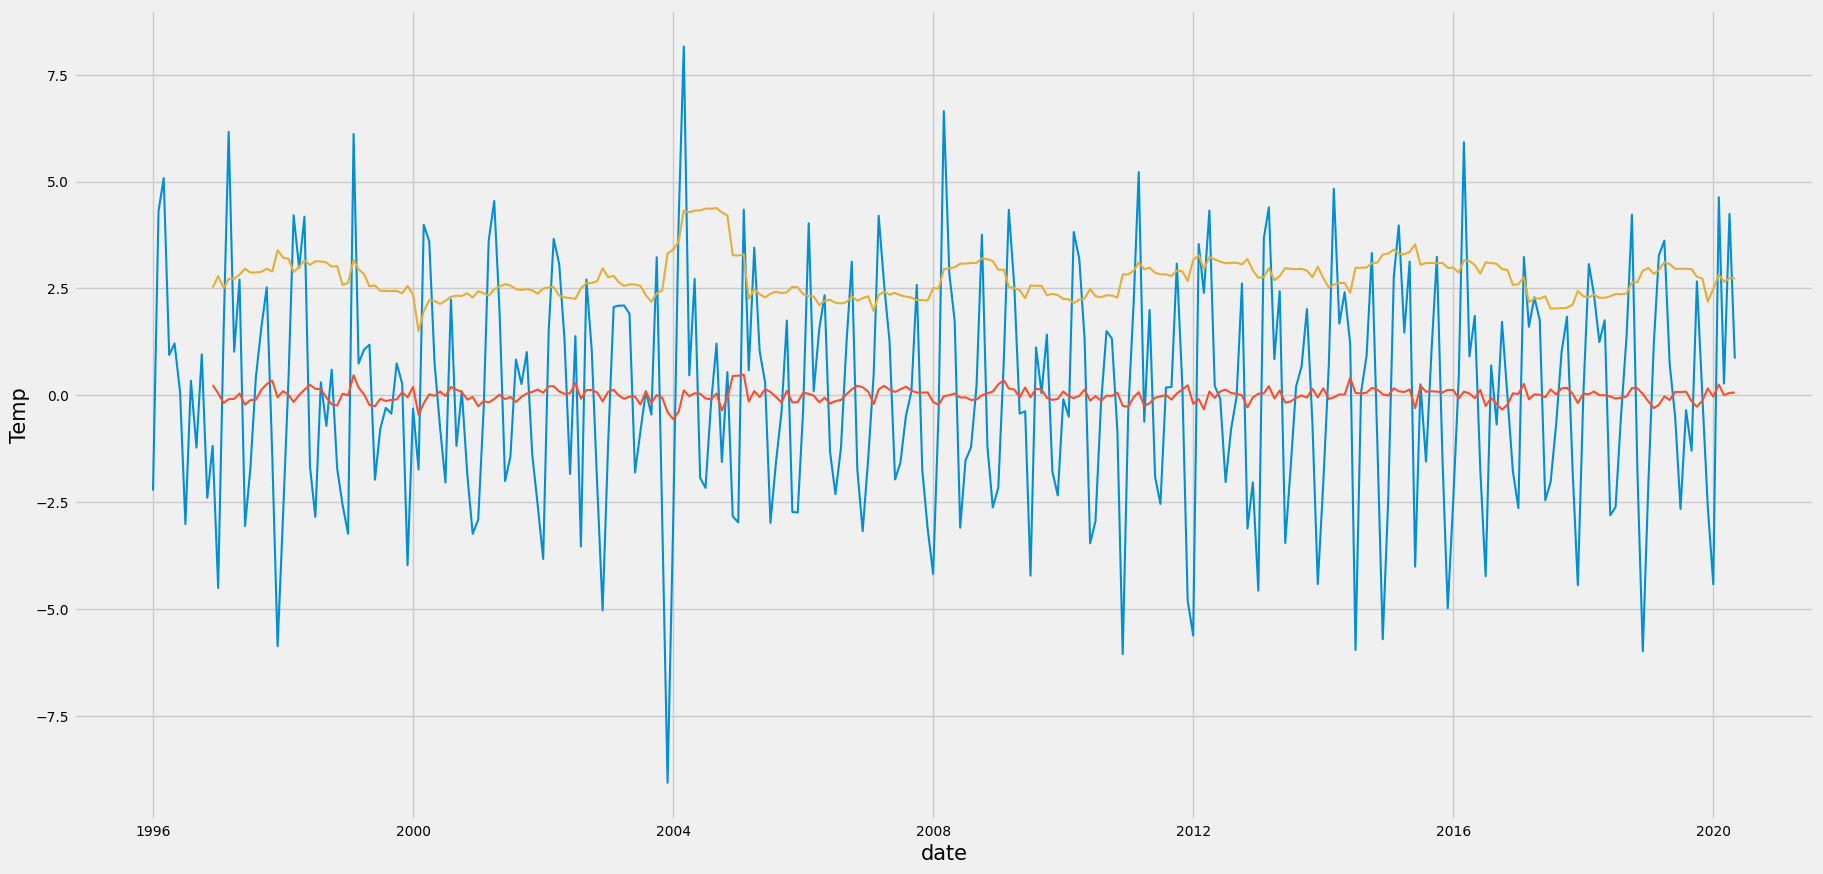

In [ ]:
test_stationarity(df.diff().dropna(), 'Temp') #Used the function for our dataset (Below achieved Stationarity since p-value less than 0.05)

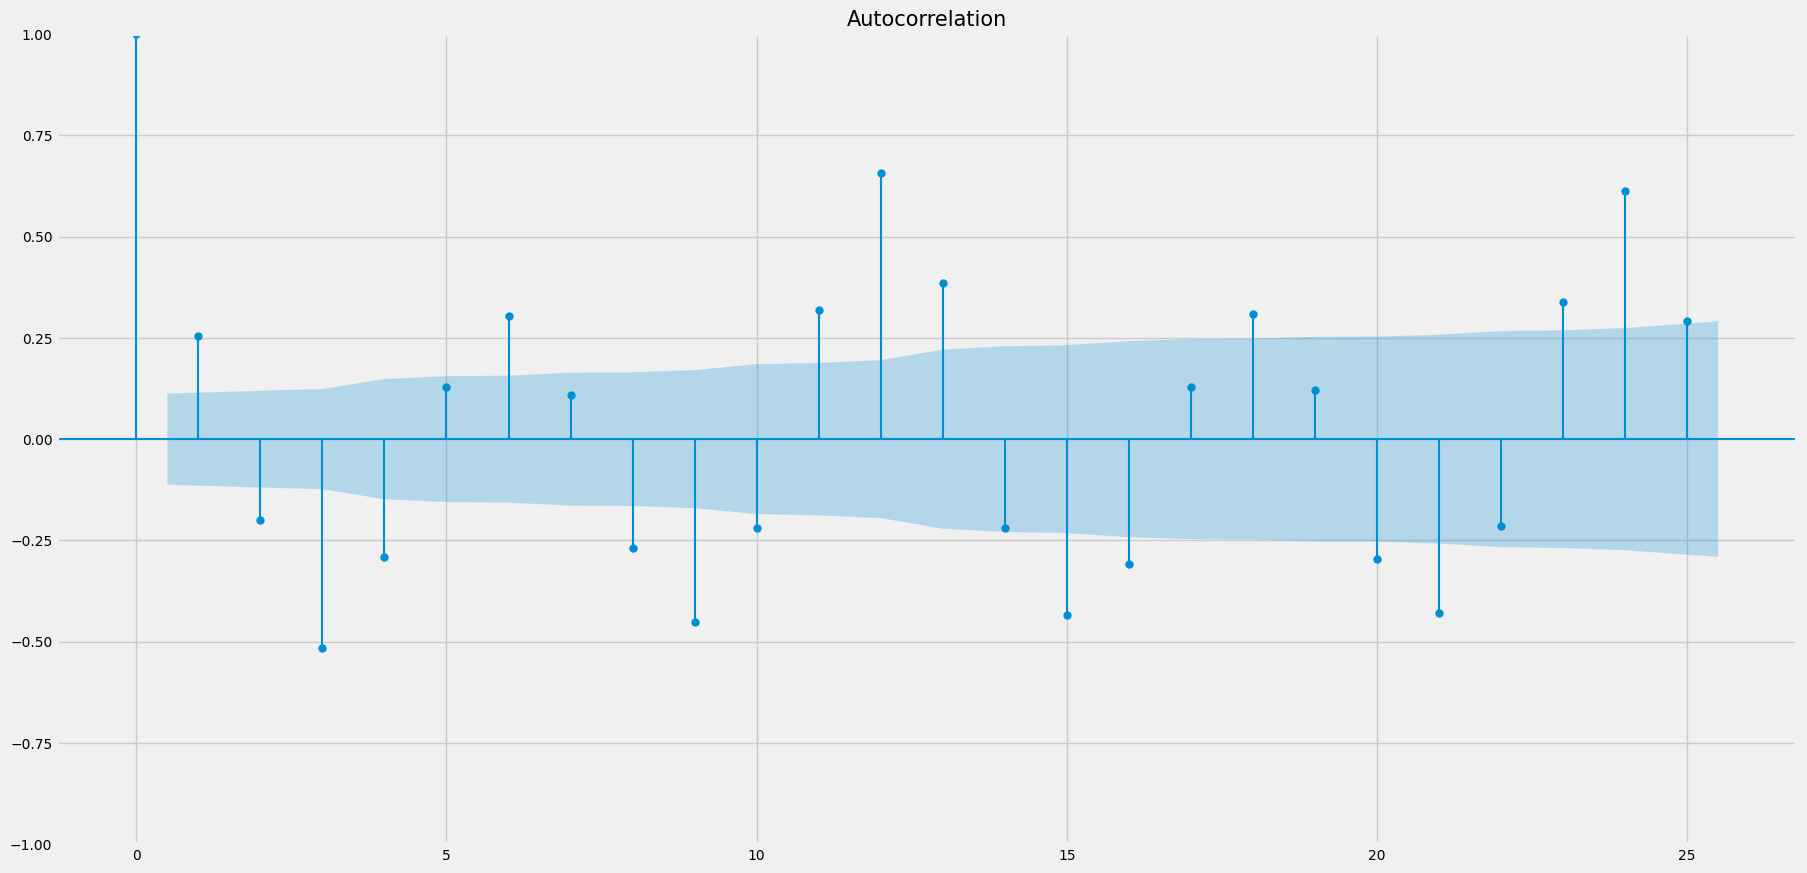

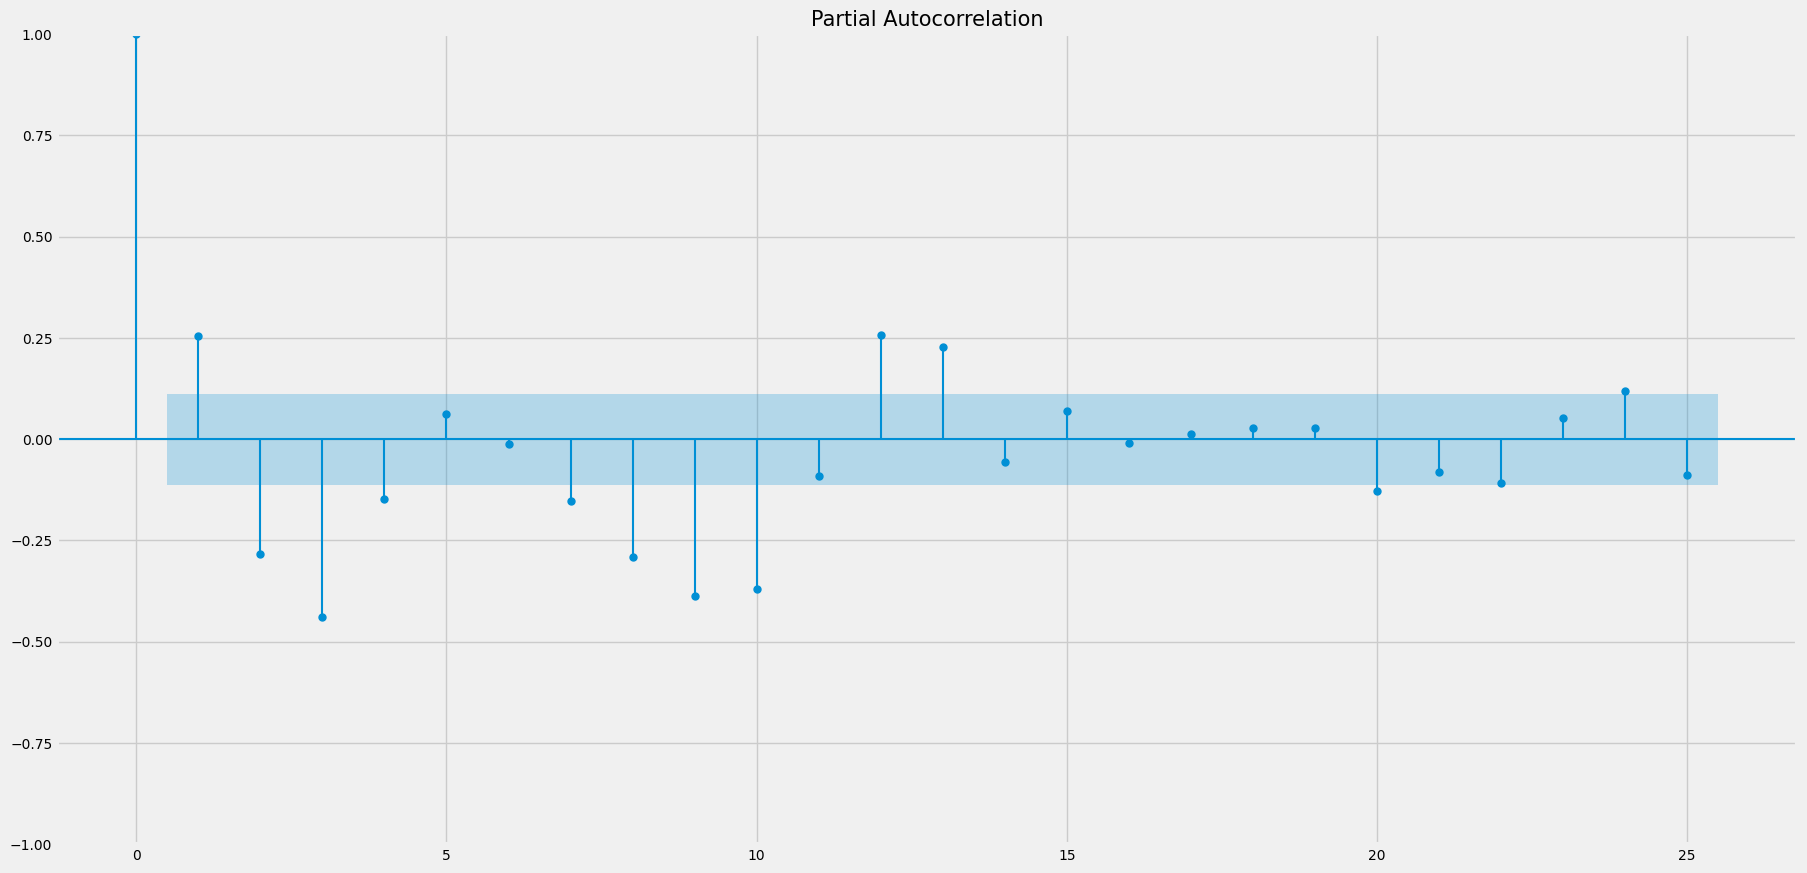

In [ ]:
plot_acf(df.Temp.diff().dropna())
plot_pacf(df.Temp.diff().dropna());

In [ ]:
train = df.Temp[:round(len(df)*70/100)] #70 % training data
test = df.Temp[round(len(df)*70/100):] #30% testing data
len(train), len(test)

(214, 91)

**ARIMA MODEL**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2.7255879320661482

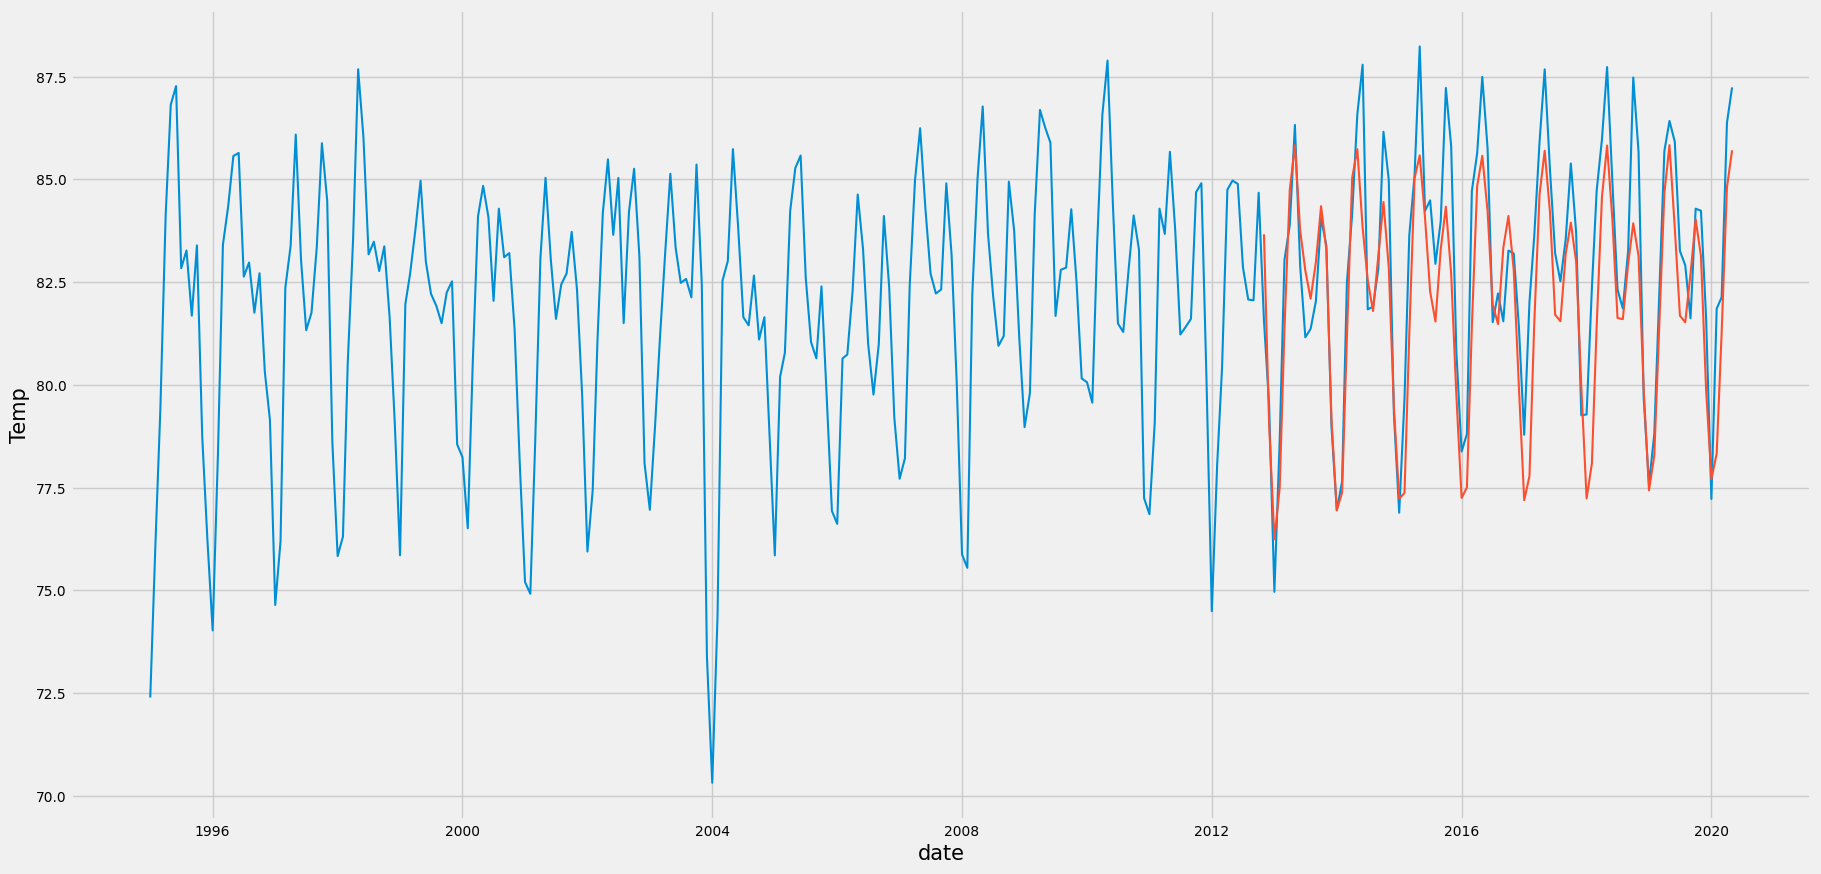

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as mse

# order is (p, d, q)
# p denotes autoregressive order and the higher the number more it will take past data into consideration
# d denotes integrated order means no of differences required to make the data stationary
# q denotes moving average order means no of lagged forecast errors are used.
# higher number captures more past errors to capture shocks or fluctuations
p = 10
d = 1   #since diff1 makes test stationary
q = 9
arima_model = ARIMA(train, order=(p, d, q))
arima_fit = arima_model.fit()
preds = arima_fit.predict(start=test.index[0], end=test.index[-1])
sns.lineplot(data=df, x=df.index, y=df.Temp)
# sns.lineplot(data=train, x=train.index, y=train.sales)
sns.lineplot(data=test, x=test.index, y=preds)

mse(test, preds)

**GRID SEARCH**

In [ ]:
# DONT RUN AGAIN TAKES A LONG TIME TO RUN
# using grid search to find optimal values
p_range = q_range = range(0,4)
d_range = range(1,2)
pdq = list(itertools.product(p_range, d_range, q_range))
PDQ = list(itertools.product(p_range, d_range, q_range, range(12,13)))
grid_search = []
best = float('inf')
pdq_order = (0, 1, 0)
PDQs_order = (0, 1, 0 ,12)
for params in pdq:
    for seasonal_params in PDQ:
        try:
            aic_val = sm.tsa.statespace.SARIMAX(df.Temp, order = params, seasonal_order = seasonal_params).fit().aic
            if aic_val < best:
                # print(f"Updating best value from {best} to {aic_val} with order {params}, {seasonal_params}")
                pdq_order = params
                PDQs_order = seasonal_params
                best = aic_val
        except:
            continue

pdq_order, PDQs_order, best

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum L

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertibl

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was prov

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization fai

((0, 1, 3), (1, 1, 2, 12), 1009.24669741821)

**SARIMA MODEL**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1.9362126943809654

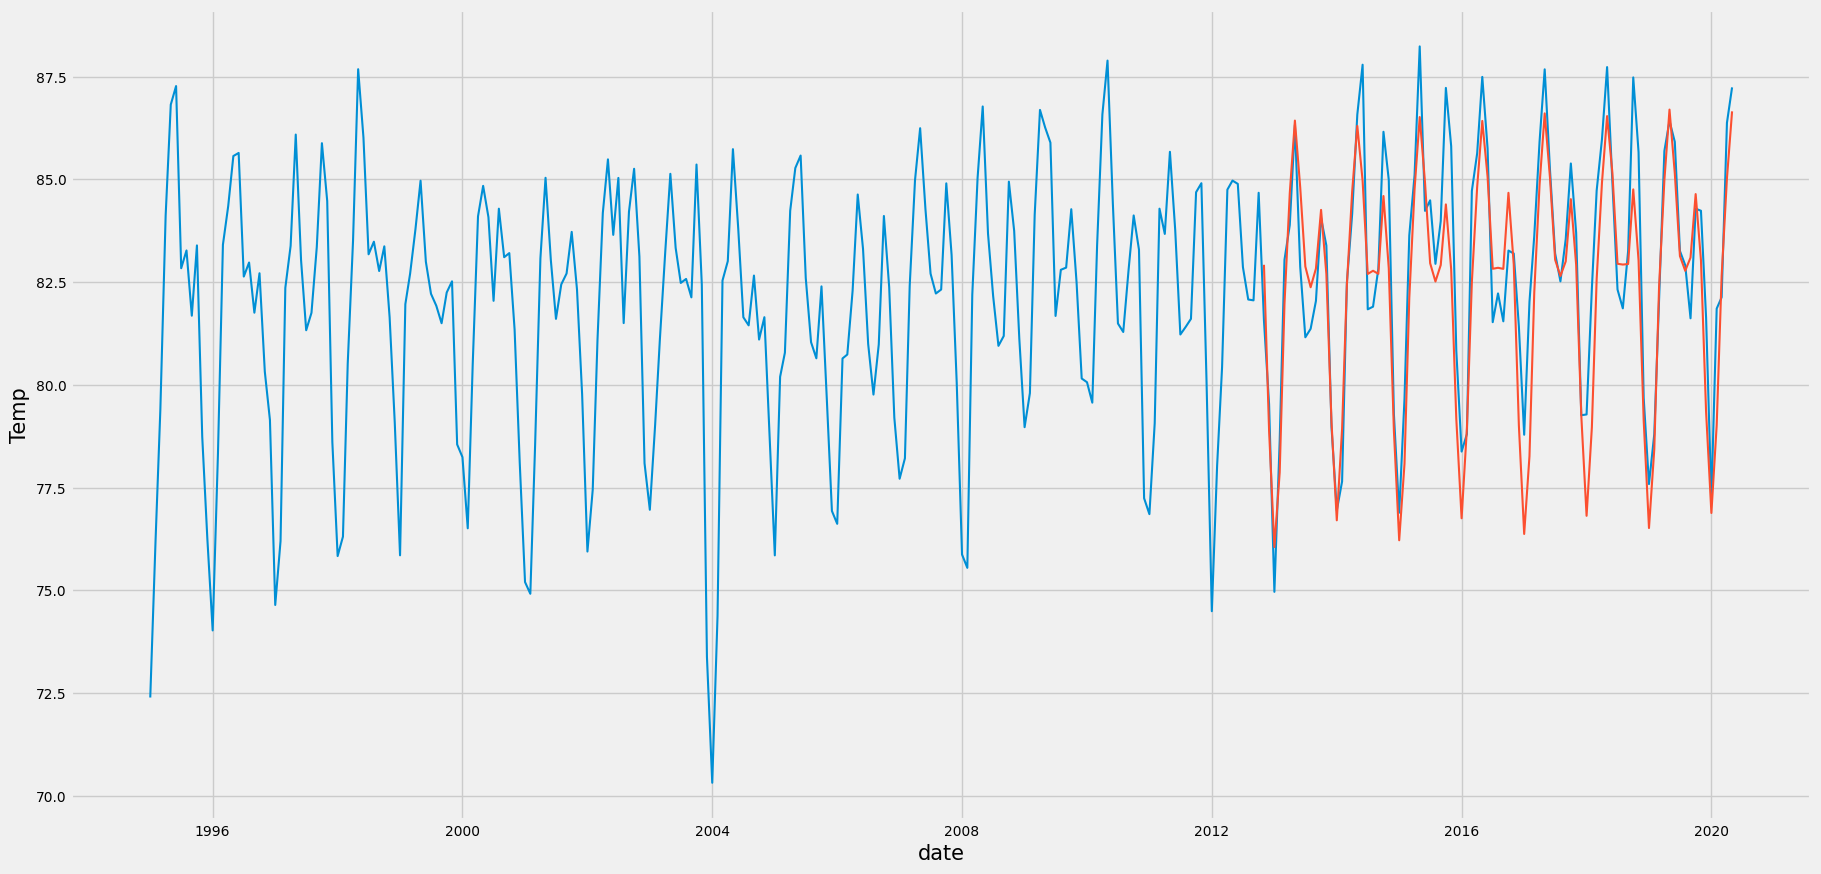

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the non-seasonal order and seasonal order for the SARIMA model
pdq_order = (0, 1, 3)  # Non-seasonal order (p, d, q)
PDQs_order = (1, 1, 2, 12)  # Seasonal order (P, D, Q, s)
# Seasonal order is represented as (P, D, Q, s), where s is the seasonal period in timesteps

# Creating a SARIMAX model with the specified orders, using the training data
sarimax_model = SARIMAX(train, order=pdq_order, seasonal_order=PDQs_order)

# Fit the SARIMA model to the training data
sarimax_fit = sarimax_model.fit()

# Generate predictions for the test set using the fitted SARIMA model
sari_preds = sarimax_fit.predict(start=test.index[0], end=test.index[-1])

# Creating line plots to visualize the actual temperature data and the SARIMA predictions
sns.lineplot(data=df, x=df.index, y=df.Temp)
sns.lineplot(data=test, x=test.index, y=sari_preds)

# Calculated the Mean Squared Error (MSE) to assess the accuracy of the predictions
mse(test, sari_preds)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


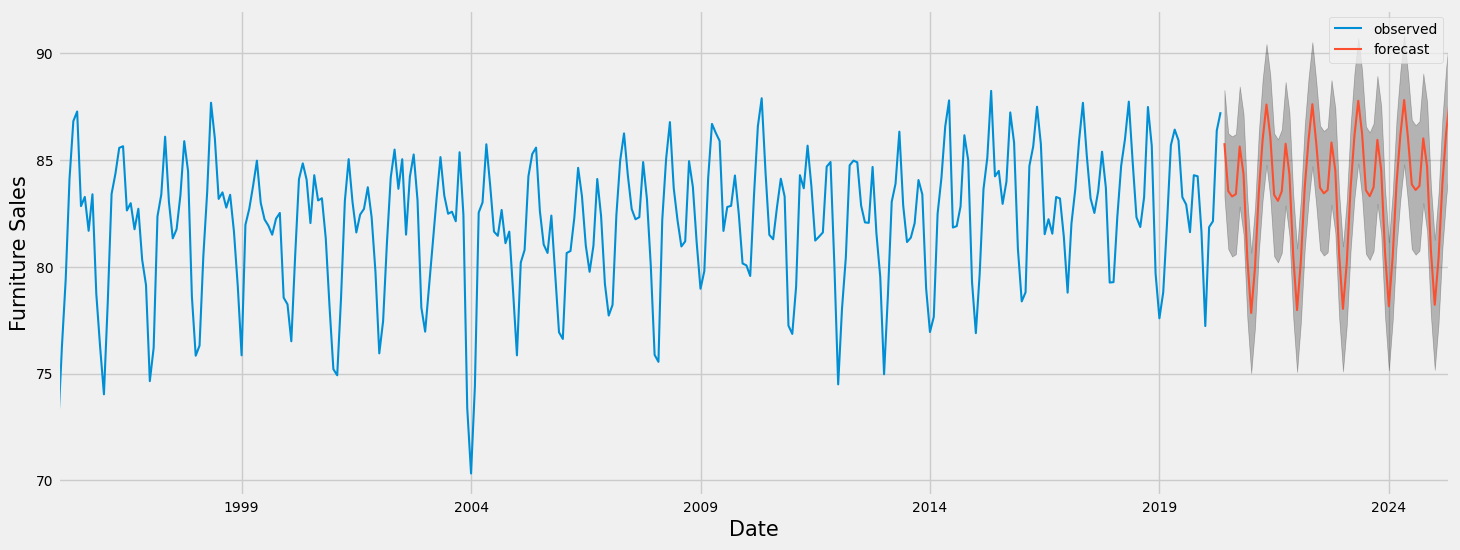

In [ ]:
# training on full data
sarimax_model = SARIMAX(df.Temp, order=pdq_order, seasonal_order=PDQs_order)
sarimax_fit = sarimax_model.fit()

pred_uc = sarimax_fit.get_forecast(steps = 12*5)
pred_ci = pred_uc.conf_int()

ax = df.Temp.plot(label = 'observed', figsize = (16, 6))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()